In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = datasets.MNIST(root='', train=True, download=True, transform=transforms.ToTensor())
test = datasets.MNIST(root='', train=False, download=False, transform=transforms.ToTensor())

In [4]:
from torch.utils.data import DataLoader

In [14]:
trainloader = DataLoader(dataset = train,batch_size=128,shuffle=True)
testloader = DataLoader(dataset = test, batch_size = 8, shuffle=False)

In [6]:
class Autoencoder(nn.Module):
    def __init__(self, in_features = 784, out_features = 784, encoded_size=32):
        super(Autoencoder, self).__init__()
        self.autoencoder = nn.Sequential(nn.Linear(in_features,encoded_size),
                                        nn.ReLU(),
                                        nn.Linear(encoded_size, out_features), 
                                        nn.Sigmoid())
    def forward(self, x):
        x = self.autoencoder(x)
        return x 
    

In [7]:
autoencoder = Autoencoder(encoded_size=50)
criterion = nn.BCELoss()
opt = torch.optim.Adam(params=autoencoder.parameters(), lr=1e-3)

In [29]:
def plot_images(images, reconstuctions):
    n_images = images.size(0)
    images = images.reshape(-1, 28, 28).numpy()
    reconstructions = reconstuctions.reshape(-1,28,28).numpy()
    fig = plt.figure(figsize=(16,6))
    for ind, img in enumerate(images):
        ax = plt.subplot(2,n_images, ind + 1)
        plt.imshow(img)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax = plt.subplot(2, n_images, ind + 1 + n_images)
        plt.imshow(reconstructions[ind])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.gray()

In [9]:
num_epochs = 50
for epoch in range(num_epochs):
    epoch_loss = 0
    for batch_i, (x_batch, y_batch) in enumerate(trainloader):
        x_batch = x_batch.reshape(-1, 784)
        output = autoencoder(x_batch)
        opt.zero_grad()
        loss = criterion(output, x_batch)
        epoch_loss += loss.item()
        loss.backward()
        opt.step()
    
    if epoch % 2 == 0:
        print('[Epoch = {}, loss = {}]'.format(epoch, epoch_loss))
        
    
    

[Epoch = 0, loss = 106.81849610805511]
[Epoch = 2, loss = 54.58923161774874]
[Epoch = 4, loss = 44.66473942250013]
[Epoch = 6, loss = 41.976204350590706]
[Epoch = 8, loss = 41.30817914009094]
[Epoch = 10, loss = 40.75266368687153]
[Epoch = 12, loss = 40.478652350604534]
[Epoch = 14, loss = 40.3668919429183]
[Epoch = 16, loss = 40.29981476068497]
[Epoch = 18, loss = 40.24421225488186]
[Epoch = 20, loss = 40.212217047810555]
[Epoch = 22, loss = 40.16798271983862]
[Epoch = 24, loss = 40.1499744579196]
[Epoch = 26, loss = 40.134889997541904]
[Epoch = 28, loss = 40.114577285945415]
[Epoch = 30, loss = 40.100449316203594]
[Epoch = 32, loss = 40.08228172361851]
[Epoch = 34, loss = 40.07507286965847]
[Epoch = 36, loss = 40.05714362114668]
[Epoch = 38, loss = 40.05575621128082]
[Epoch = 40, loss = 40.04875814169645]
[Epoch = 42, loss = 40.038051545619965]
[Epoch = 44, loss = 40.0282084941864]
[Epoch = 46, loss = 40.02368701994419]
[Epoch = 48, loss = 40.01650056242943]


In [17]:
iterator = iter(testloader)

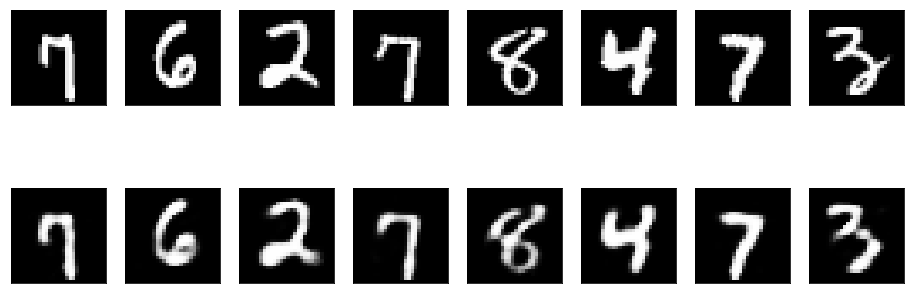

In [31]:
x_batch, y_batch = next(iterator)
x_batch = x_batch.reshape(-1, 784)
reconstruction = autoencoder(x_batch)
plot_images(x_batch, reconstruction.detach())